In [1]:
# [RDKitを用いた部分構造検索とMCSアルゴリズム | 化学の新しいカタチ](https://future-chem.com/substruct-search-mcs/)

In [84]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, rdFMCS
from rdkit.Chem.Scaffolds import MurckoScaffold

import pubchempy as pcp

In [4]:
suppl = Chem.SDMolSupplier('./sdf/boronicacid_pynacolester.sdf')
mols = [x for x in suppl if x is not None]
len(mols)

200

In [18]:
### prepare PhBpin for template
ph_bpin = pcp.get_compounds('phenyl boronic acid pinacol ester', 'name')
len(ph_bpin) #=> 1

ph_bpin = ph_bpin[0]
tmp = Chem.MolFromSmiles(ph_bpin.canonical_smiles)

Compound(570673)


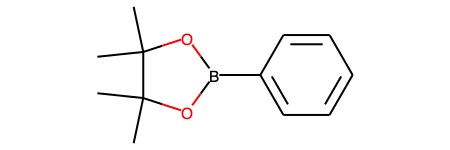

In [27]:
print(ph_bpin)
tmp

In [20]:
ph_mols = [x for x in suppl if x.HasSubstructMatch(tmp)]
len(ph_mols)

137

In [32]:
matches = ph_mols[4].GetSubstructMatches(tmp)


In [29]:
print(matches)

((17, 16, 15, 14, 13, 25, 26, 23, 24, 10, 9, 7, 8, 12, 11), (22, 21, 20, 19, 18, 27, 28, 29, 30, 4, 3, 2, 1, 0, 5))


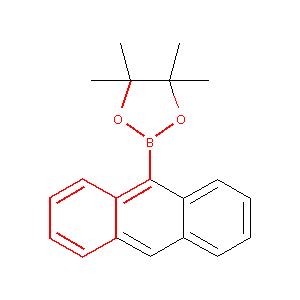

In [36]:
Draw.MolToImage(ph_mols[0], highlightAtoms=matches[0])

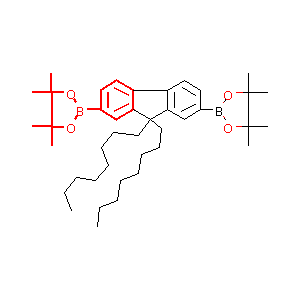

In [33]:
Draw.MolToImage(ph_mols[4], highlightAtoms=matches[1])

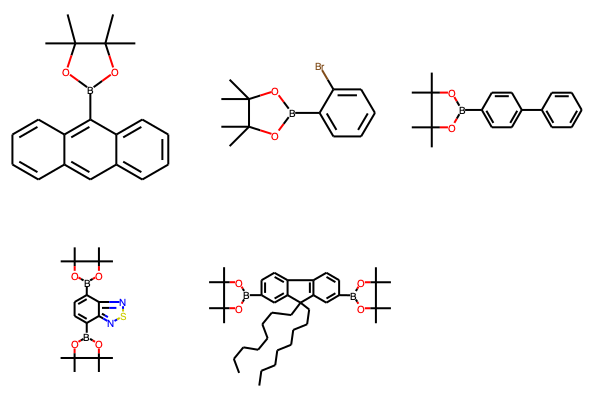

In [53]:
Draw.MolsToGridImage(ph_mols[0:5])

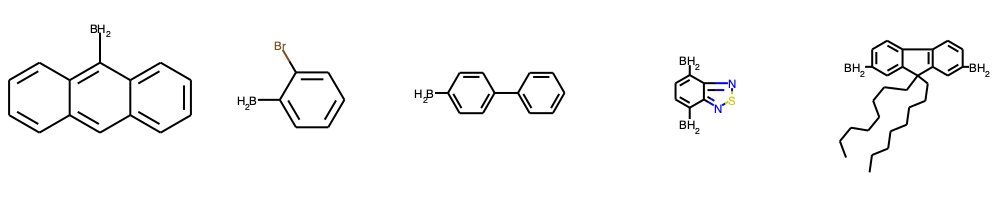

In [55]:
delete_mols = [AllChem.DeleteSubstructs(x, Chem.MolFromSmiles('CC(C)(C(C)(C)O)O')) for x in ph_mols]
Draw.MolsToGridImage(delete_mols[0:5], molsPerRow=5)

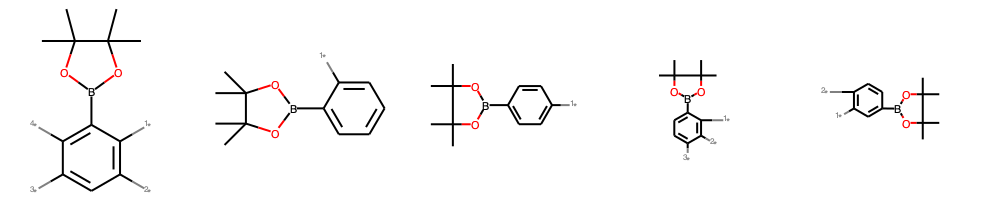

In [57]:
replace_side = [AllChem.ReplaceSidechains(x, tmp) for x in ph_mols]
Draw.MolsToGridImage(replace_side[:5], molsPerRow=5)

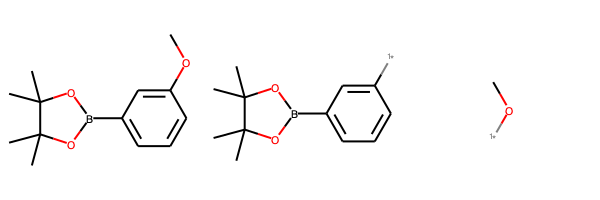

In [69]:
replace_core = [AllChem.ReplaceCore(x, tmp) for x in ph_mols]
Chem.MolToSmiles(replace_core[67])
Draw.MolsToGridImage([ph_mols[67], replace_side[67], replace_core[67]])

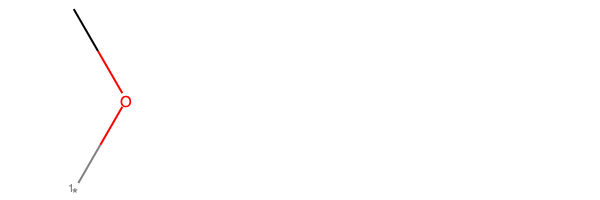

In [70]:
side_mol = Chem.GetMolFrags(replace_core[67], asMols=True)
Draw.MolsToGridImage([x for x in side_mol])

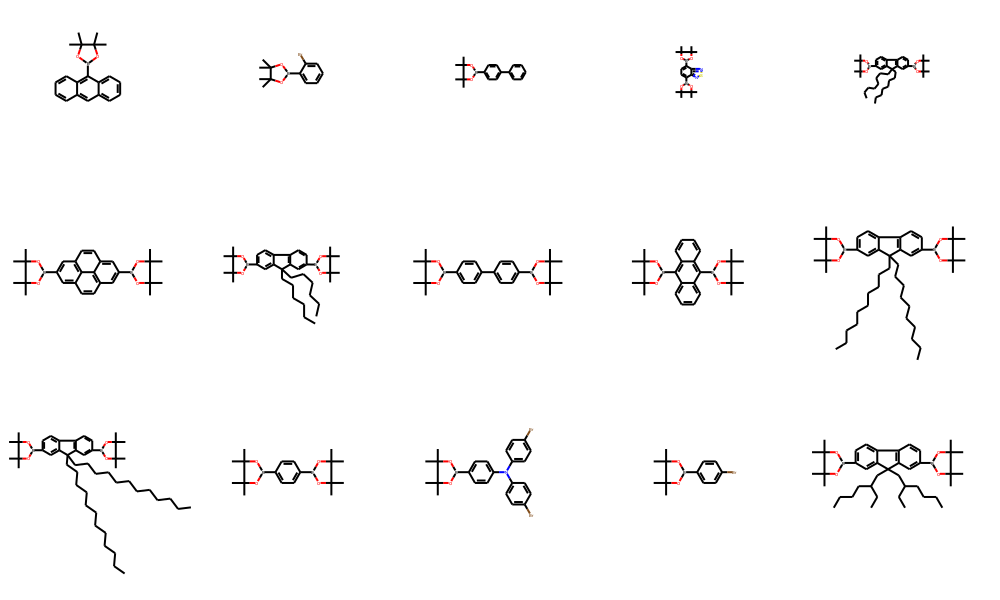

In [71]:
Draw.MolsToGridImage(ph_mols[0:15], molsPerRow=5)

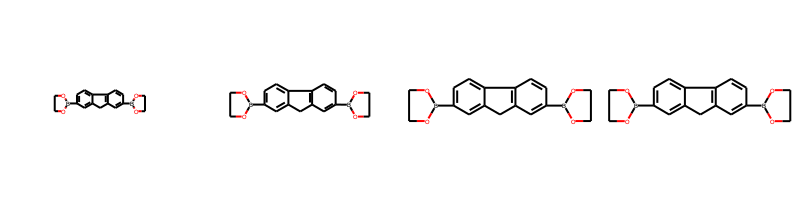

In [72]:
compounds = [4, 6, 9, 14]
scaffold1 = [MurckoScaffold.GetScaffoldForMol(ph_mols[i]) for i in compounds]
Draw.MolsToGridImage(scaffold1, molsPerRow=4)

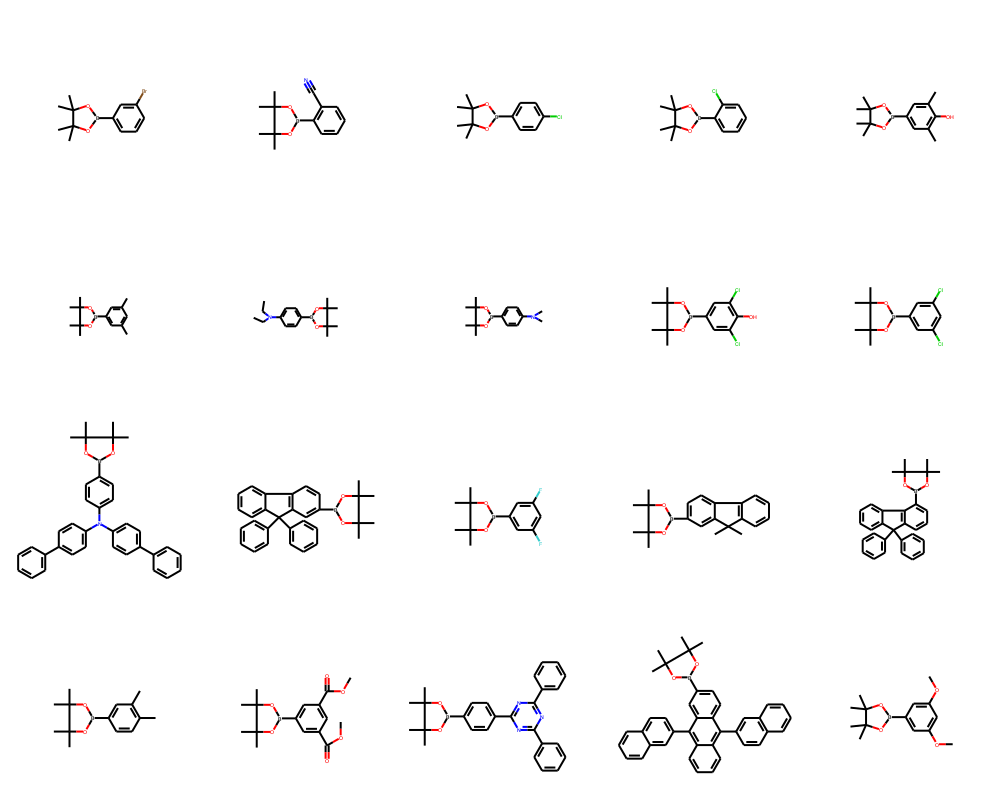

In [102]:
Draw.MolsToGridImage(ph_mols[30:50], molsPerRow=5)

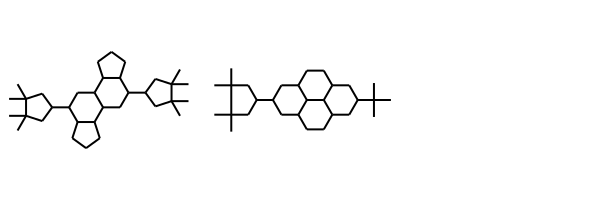

In [82]:
Draw.MolsToGridImage([MurckoScaffold.MakeScaffoldGeneric(ph_mols[i]) for i in (21, 22)])

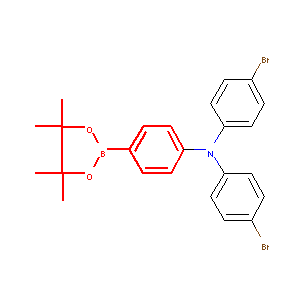

In [90]:
ph_mols_sample1 = 12
ph_mols_sample2 = 19

mcs_01 = rdFMCS.FindMCS([ph_mols[ph_mols_sample1], ph_mols[ph_mols_sample2]])
mol_mcs_01 = Chem.MolFromSmarts(mcs_01.smartsString)
Draw.MolToImage(ph_mols[ph_mols_sample1], highlightAtoms=ph_mols[ph_mols_sample1].GetSubstructMatch(mol_mcs_01))

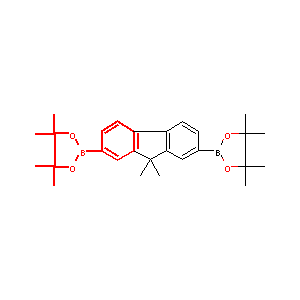

In [89]:
Draw.MolToImage(ph_mols[ph_mols_sample2], highlightAtoms=ph_mols[ph_mols_sample2].GetSubstructMatch(mol_mcs_01))

In [103]:
f1 = rdFMCS.FindMCS([ph_mols[39], ph_mols[40]])
f2 = rdFMCS.FindMCS([ph_mols[39], ph_mols[40]], bondCompare=rdFMCS.BondCompare.CompareOrderExact)
f3 = rdFMCS.FindMCS([ph_mols[39], ph_mols[40]], ringMatchesRingOnly=True)
mcs = [Chem.MolFromSmarts(x.smartsString) for x in (f1, f2, f3)]

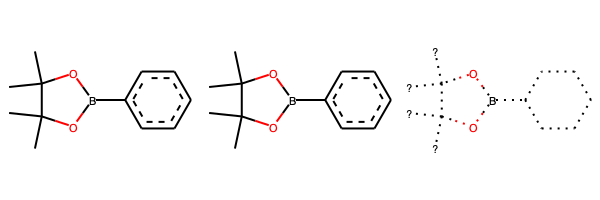

In [104]:
Draw.MolsToGridImage(mcs)

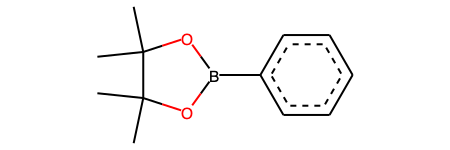

In [99]:
Chem.MolFromSmarts(f1.smartsString)

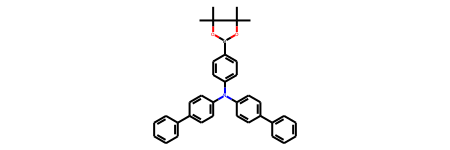

In [105]:
ph_mols[40]